In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
cdfx = pd.read_csv("./catapult_spmv.csv", index_col=0)
vdfx = pd.read_csv("./final_result_impl_spmv_int.csv", index_col=0)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
cdfx['mem_partition_size1'] = cdfx['knob_array_part1']
vdfx['mem_partition_size1'] = pd.to_numeric(512/(vdfx['knob_array_partition1']), downcast='integer')
cdfx['mem_partition_size2'] = cdfx['knob_array_part2']
vdfx['mem_partition_size2'] = pd.to_numeric(vdfx['knob_UNROLL_F']/(vdfx['knob_array_partition2']), downcast='integer')

cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_array_part1'])
cdfx = cdfx.drop(columns=['knob_array_part2'])
vdfx = vdfx.drop(columns=['knob_array_partition1'])
vdfx = vdfx.drop(columns=['knob_array_partition2'])

In [3]:
print(cdfx.count())
cdfx.head()

knob_UNROLL_F          2863
knob_outer_unroll      2863
knob_inner_unroll1     2863
knob_inner_unroll2     2863
obj1                   2863
obj2                   2863
lut                    2863
ff                     2863
dsp                    2863
bram                   2863
throughput             2863
ff_inv                 2863
lut_inv                2863
1/obj2                 2863
clbUtil                2863
mem_partition_size1    2863
mem_partition_size2    2863
dtype: int64


,knob_UNROLL_F,knob_outer_unroll,knob_inner_unroll1,knob_inner_unroll2,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size1,mem_partition_size2
n,,,,,,,,,,,,,,,,,
1,2,1,1,1,0.000147,113,572,434,1,0,0.204082,0.002304,0.001748,0.805310,0.000765,512,2
2,2,1,1,1,0.000175,178,755,444,1,0,0.171429,0.002252,0.001325,0.511236,0.001204,512,4
3,2,1,1,1,0.000171,171,739,444,1,0,0.175439,0.002252,0.001353,0.532164,0.001157,512,8
4,2,1,1,1,0.000226,236,1014,460,1,0,0.132743,0.002174,0.000986,0.385593,0.001597,512,16
5,2,1,1,1,0.000204,262,1014,460,1,0,0.147059,0.002174,0.000986,0.347328,0.001773,512,32


In [4]:
print(vdfx.count())
vdfx.head()

knob_UNROLL_F          3055
knob_outer_unroll      3055
knob_inner_unroll1     3055
knob_inner_unroll2     3055
obj1                   3055
obj2                   3055
lut                    3055
ff                     3055
dsp                    3055
bram                   3055
throughput             3055
ff_inv                 3055
lut_inv                3055
1/obj2                 3055
clbUtil                3055
mem_partition_size1    3055
mem_partition_size2    3055
dtype: int64


,knob_UNROLL_F,knob_outer_unroll,knob_inner_unroll1,knob_inner_unroll2,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size1,mem_partition_size2
n,,,,,,,,,,,,,,,,,
0,2,1,1,1,0.000185,244,1243,1033,8,8,0.162162,0.000968,0.000805,0.372951,0.001651,256,1
1,2,1,1,1,0.000178,252,1304,1039,8,8,0.168539,0.000962,0.000767,0.361111,0.001705,128,1
2,2,1,1,1,0.000179,305,1619,1045,8,8,0.167598,0.000957,0.000618,0.298361,0.002064,64,1
3,2,1,1,1,0.000184,373,2065,1054,8,8,0.163043,0.000949,0.000484,0.243968,0.002524,32,1
4,2,1,1,1,0.000185,612,3236,1079,8,8,0.162162,0.000927,0.000309,0.148693,0.004141,16,1


In [5]:
cmn_col = np.intersect1d(cdfx.columns, vdfx.columns)

Text(0, 0.5, 'CLB Resources (Normalized 1/CLB)')

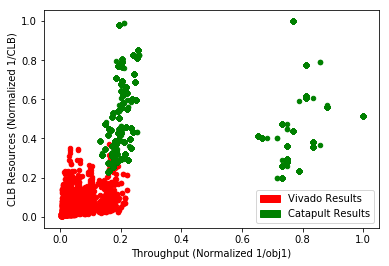

In [6]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Vivado Results')
green_data = mpatches.Patch(color='green', label='Catapult Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')

Text(0, 0.5, 'Normalized 1/CLB (1/obj2)')

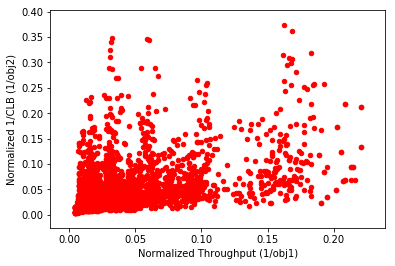

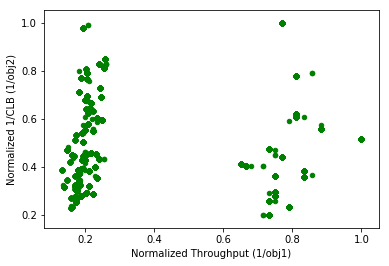

In [7]:
ax1 = vdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='r')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
ax = cdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='g')
#ax1.set_ylim(0,0.001)
#ax1.set_xlim(0,1)
#ax.set_ylim(0.2, 0.6)
#ax.set_xlim(0,0.0000004)
#red_data = mpatches.Patch(color='green', label='Vivado Results')
#green_data = mpatches.Patch(color='red', label='Catapult Results')
#plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')

In [8]:
print("~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~

knob_UNROLL_F             5.818372
knob_outer_unroll         1.901153
knob_inner_unroll1        2.503318
knob_inner_unroll2        2.477471
obj1                      0.000125
obj2                    216.090814
lut                    1089.205728
ff                      373.211317
dsp                       1.876004
bram                      0.000000
throughput                0.345277
ff_inv                    0.002760
lut_inv                   0.001054
1/obj2                    0.487194
clbUtil                   0.001462
mem_partition_size1     244.185819
mem_partition_size2      10.524974
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~

knob_UNROLL_F             16.691980
knob_outer_unroll          1.936825
knob_inner_unroll1         2.414075
knob_inner_unroll2         2.441244
obj1                       0.001535
obj2                    3814.025532
lut                    18359.614730
ff      

In [9]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_UNROLL_F','mem_partition_size1', 
                                          'mem_partition_size2', 'knob_outer_unroll', 
                                          'knob_inner_unroll1', 'knob_inner_unroll2'], how='inner')
cv_df.count()

knob_UNROLL_F          693
knob_outer_unroll      693
knob_inner_unroll1     693
knob_inner_unroll2     693
obj1_x                 693
obj2_x                 693
lut_x                  693
ff_x                   693
dsp_x                  693
bram_x                 693
throughput_x           693
ff_inv_x               693
lut_inv_x              693
1/obj2_x               693
clbUtil_x              693
mem_partition_size1    693
mem_partition_size2    693
obj1_y                 693
obj2_y                 693
lut_y                  693
ff_y                   693
dsp_y                  693
bram_y                 693
throughput_y           693
ff_inv_y               693
lut_inv_y              693
1/obj2_y               693
clbUtil_y              693
dtype: int64

(0, 1)

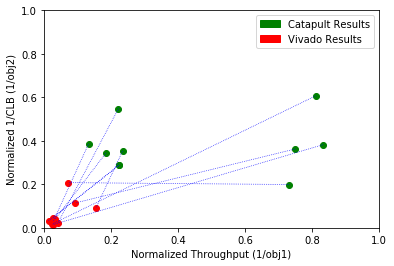

In [10]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

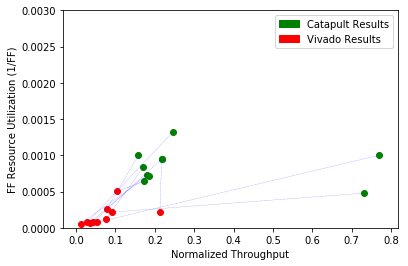

In [11]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)

In [ ]:
df_sample = cv_df.sample(30)